In [83]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import tarfile
import pathlib

In [103]:
# Inputs ETH
run_type = 'ov'

if run_type == 'brca':
   
    sample_target = 'TCGA-AO-A0JM-01A-21R-A056-07'
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Breast_1102'
    filtering_id = 'chosen_filters_06March_order' # OLD!!!!
elif run_type == 'ov':
    sample_target = 'TCGA-25-1319-01A-01R-1565-13'
    basedir = '/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374'
    filtering_id = 'filters_22March_order_wany_wAnnot'

filter_dir = os.path.join(basedir, 'filtering_samples', filtering_id)

In [104]:
# Inputs OHSU
path_ohsu = f'output/kmer_files/J_{sample_target}_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv'

tar_file_OHSU = '/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/include_ANY_filters_OHSU-results_March22-2023/OHSU_March27-2023_fixAnyfilters_results.tar.gz'

In [105]:
path_ohsu

'output/kmer_files/J_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1.tsv'

In [106]:
# File obtained from 
# 1. Filtered kmer list 
# 2. Generation info
# 3. Added a lot of false positive related information in projects2020_ohsu/eth/debug/debug_false_positives/p20230307_filter_allRF_quality_check.ipynb

metadata = 'metadata2'
path_interest = f'G_{sample_target}_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1{metadata}.tsv.gz'

path = os.path.join(filter_dir, path_interest)
plot_dir = os.path.join(filter_dir, 'plots')
base_plot = path_interest.replace('.tsv.gz', '')
pathlib.Path(plot_dir).mkdir(parents=True, exist_ok=True)

# Plot 1

In [107]:
df = pd.read_csv(path, sep = '\t')
print(f'Reading {path}')
display(df.head())


Reading /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_22March_order_wany_wAnnot/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2.tsv.gz


,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA25131301A01R156513all,TCGA61200801A02R156813all,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available
0,RMREATKGP,NaN,NaN,NaN,NaN,NaN,NaN,55350885:55350897:55352540:55352555:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False
1,QVERMREAT,NaN,NaN,NaN,NaN,NaN,NaN,55350876:55350897:55352540:55352546:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False
2,VERMREATK,NaN,NaN,NaN,NaN,NaN,NaN,55350879:55350897:55352540:55352549:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False
3,MREATKGPV,NaN,NaN,NaN,NaN,NaN,NaN,55350888:55350897:55352540:55352558:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False
4,VQVERMREA,NaN,NaN,NaN,NaN,NaN,NaN,55350873:55350897:55352540:55352543:None:None,False,True,...,0.0,0.0,0.0,0.0,NaN,+,55350897:55352540,False,False,False


In [108]:
print(df.columns)


Index(['kmer', 'gtexCohortfilter >0.0', 'gtexCohortfilter >=1.0',
       'gtexCohortfilter >=2.0', 'gtexCohortfilter >=3.0',
       'gtexCohortfilter >=5.0', 'gtexCohortfilter >=10.0', 'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 'cancerCohortfilter >=1.0',
       'cancerCohortfilter >=2.0', 'cancerCohortfilter >=3.0',
       'cancerCohortfilter >=5.0', 'cancerCohortfilter >=10.0',
       'TCGA25131901A01R156513all', 'TCGA25131301A01R156513all',
       'TCGA61200801A02R156813all', 'TCGA24143101A01R156613all',
       'TCGA24229801A01R156913all', 'isAnnotated', 'strand',
       'junction_coordinate', 'coordinate_in_GTEX', 'gtexExon2<cancExon2',
       'info_not_available'],
      dtype='object')


In [109]:
recurr_col = 'cancerCohortfilter >0.0'
expr_col = sample_target.replace('-', '') + 'all'
check_in_gtex_coord = 'coordinate_in_GTEX'
check_exons_length = 'gtexExon2<cancExon2'
jxannot = 'junctionAnnotated'
rfannot = 'readFrameAnnotated'
idx = 'index'
info = 'info_not_available'
df = df.sort_values(by=[recurr_col])
df[idx] = np.arange(len(df))

In [110]:
df[[recurr_col, expr_col, check_in_gtex_coord, check_exons_length, jxannot, rfannot, info, idx]]

,cancerCohortfilter >0.0,TCGA25131901A01R156513all,coordinate_in_GTEX,gtexExon2<cancExon2,junctionAnnotated,readFrameAnnotated,info_not_available,index
23947,1,1.678609,True,False,True,True,False,0
83973,1,1.678609,True,False,False,False,False,1
83974,1,1.678609,True,False,False,False,False,2
29292,1,1.678609,True,False,False,False,False,3
83975,1,1.678609,True,False,False,False,False,4
...,...,...,...,...,...,...,...,...
21201,374,2296.337484,True,False,True,False,False,131957
21205,374,2296.337484,True,False,True,False,False,131958
34601,374,53.715497,True,False,True,False,False,131959
58294,374,146.039007,True,False,True,False,False,131960


In [111]:
#df = df.tail(50)

In [ ]:
plot_in_GTEX = True

if plot_in_GTEX: 
    col = check_in_gtex_coord
    color3 = 'lightcoral'
    legend3 = 'Junction coordinate in GTEX FULL (> 9000) cohort graph'
    suffix = '_coordinate'

else:
    col = check_exons_length
    color3 = 'yellow'
    legend3 = 'Case *: Second GTEX Exon small'
    suffix = ''

marker_size = 4
color1 = 'blue'
color2 = 'darkorange'
color4 = 'green'
colorgrid = 'grey'
alpha_marker1 = 0.7
alpha_marker2 = 0.5
alpha_bar = 0.3
alpha_grid = 0.2

# Figure initialize 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax3 = ax.twinx()
ax4 = ax.twinx()



# Ax 1
df.plot(x=idx, y=expr_col, ax=ax, legend=False, marker='|', alpha=alpha_marker1,
        linestyle = 'None', markerfacecolor=color1, markeredgecolor=color1, markersize=marker_size)
ax.set_ylabel('Upper quantile normalized expression')
ax.tick_params(axis='y', colors=color1)
ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)

# Ax 2
df.plot(x=idx, y=recurr_col, ax=ax2, legend=False, marker="|", alpha=alpha_marker2,
              linestyle = 'None', markerfacecolor='None', markeredgecolor=color2, markersize=marker_size)
ax2.set_ylabel('Recurrence in BRCA cohort including target sample')
ax2.tick_params(axis='y', colors=color2) #, labelsize=14)

# Ax 3
ax3.bar(x=df[idx], height=df[col], alpha=alpha_bar, color=color3)
ax3.legend([legend3], loc='upper left')
ax3.tick_params(axis='y', colors=color3) #, labelsize=14)
ax3.set_yticks([])
ax3.set_yticks([], minor=False)

# Ax 4
ax4.bar(x=df[idx], height=df[info], alpha = alpha_bar, color=color4)
ax4.legend(['No info'], loc="upper left", bbox_to_anchor=(0, 0.9))
ax4.tick_params(axis='y', colors=color4) #, labelsize=14)
ax4.set_yticks([])
ax4.set_yticks([], minor=False)

# All plots
ax.set_xlabel(f'kmer-coordinate instance (Total {len(df)} kmers)')
ax.set_yscale("log")
ax2.set_yscale("log")
#ax.figure.legend()


save = True
name = 'Recurr_expr' + suffix
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()

/scratch/slurm-job.874041/ipykernel_3371416/937530964.py:39: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
/scratch/slurm-job.874041/ipykernel_3371416/937530964.py:40: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)


# Plot 2

In [ ]:
# Read OHSU Data
with tarfile.open(tar_file_OHSU, "r:*") as tar: #OHSU
    df_ohsu = pd.read_csv(tar.extractfile(path_ohsu), header=0, sep="\t")

In [ ]:
print(tar_file_OHSU)

In [ ]:
path_ohsu

In [ ]:
df_ohsu.shape


In [ ]:
df_ohsu.tail()

In [ ]:
# Compute shared kmers across the two pipelines
shared_col = 'shared_across_labs'
shared_kmers = set(df_ohsu['kmer']).intersection(set(df['kmer']))

df_ohsu = df_ohsu.set_index('kmer')
df_ohsu.loc[list(shared_kmers), shared_col] = True
df_ohsu = df_ohsu.reset_index().drop_duplicates()

# Merge to ETH
df = df.merge(df_ohsu, on = 'kmer', how = 'left')
df[shared_col] = df[shared_col].fillna(False)

In [ ]:
df.head()

In [ ]:
marker_size = 4
color1 = 'blue'
color2 = 'darkorange'
color3 = 'cyan'
color4 = 'green'
colorgrid = 'grey'
alpha_marker1 = 0.7
alpha_marker2 = 0.5
alpha_bar = 0.2
alpha_grid = 0.2

# Figure initialize 
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax2 = ax.twinx()
ax3 = ax.twinx()


# Ax 1
df.plot(x=idx, y=expr_col, ax=ax, legend=False, marker='|', alpha=alpha_marker1,
        linestyle = 'None', markerfacecolor=color1, markeredgecolor=color1, markersize=marker_size)
ax.set_ylabel('Upper quantile normalized expression')
ax.tick_params(axis='y', colors=color1)
ax.grid(b=True, which='major', color=colorgrid, linestyle='-', alpha=alpha_grid)
ax.grid(b=True, which='minor', color=colorgrid, linestyle='--', alpha=alpha_grid)

# Ax 2
df.plot(x=idx, y=recurr_col, ax=ax2, legend=False, marker="|", alpha=alpha_marker2,
              linestyle = 'None', markerfacecolor='None', markeredgecolor=color2, markersize=marker_size)
ax2.set_ylabel('Recurrence in BRCA cohort including target sample')
ax2.tick_params(axis='y', colors=color2) #, labelsize=14)

# Ax 3
ax3.bar(x=df[idx], height=df[shared_col], alpha=alpha_bar, color=color3)
ax3.legend([f'Shared across labs : {len(shared_kmers)} kmers'], loc='upper left')
ax3.tick_params(axis='y', colors=color3) #, labelsize=14)
ax3.set_yticks([])
ax3.set_yticks([], minor=False)

# # Ax 4
# ax4.bar(x=df[idx], height=df[info], alpha = alpha_bar, color=color4)
# ax4.legend(['No info'], loc="upper left", bbox_to_anchor=(0, 0.9))
# ax4.tick_params(axis='y', colors=color4) #, labelsize=14)
# ax4.set_yticks([])
# ax4.set_yticks([], minor=False)

# All plots
ax.set_xlabel(f'kmer instance (Total {len(df)} kmers)')
ax.set_yscale("log")
ax2.set_yscale("log")
#ax.figure.legend()


save = True
name = 'Recurr_expr_shareness_cyan'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()

# TESTS

In [20]:
df.head()

,kmer,gtexCohortfilter >0.0,gtexCohortfilter >=1.0,gtexCohortfilter >=2.0,gtexCohortfilter >=3.0,gtexCohortfilter >=5.0,gtexCohortfilter >=10.0,coord,junctionAnnotated,readFrameAnnotated,...,TCGA24143101A01R156613all,TCGA24229801A01R156913all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available,index,shared_across_labs
0,LKFLYSRPI,NaN,NaN,NaN,NaN,NaN,NaN,1997343:1997348:1993163:1993176:1993078:1993087,True,True,...,0.0,0.0,NaN,-,1993176:1997343:1993163:1993087,True,False,False,0,True
1,NGLLSTLQK,NaN,NaN,NaN,NaN,NaN,NaN,102905319:102905325:102908697:102908718:None:None,False,False,...,0.0,0.0,NaN,+,102905325:102908697,True,False,False,1,True
2,TASYNGLLS,NaN,NaN,NaN,NaN,NaN,NaN,102905307:102905325:102908697:102908706:None:None,False,False,...,0.0,0.0,NaN,+,102905325:102908697,True,False,False,2,True
3,TLMAQMASG,NaN,NaN,NaN,NaN,NaN,NaN,102044321:102044332:102044477:102044493:None:None,False,False,...,0.0,0.0,NaN,+,102044332:102044477,True,False,False,3,True
4,ASYNGLLST,NaN,NaN,NaN,NaN,NaN,NaN,102905310:102905325:102908697:102908709:None:None,False,False,...,0.0,0.0,NaN,+,102905325:102908697,True,False,False,4,True


In [21]:
df_shared = df.loc[df['shared_across_labs'] == True]
display(df_shared.shape)


(43156, 31)

In [75]:
ohsu_gener = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/share_OHUS_PNLL/OHSU_Feb2023_complete-annotated-shortlist.tsv.gz', sep='\t')

/cluster/customapps/biomed/grlab/users/prelotla/software/miniconda/envs/pep3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3139: DtypeWarning: Columns (57,58,60,62,63,64,65,66,67,68,70,72) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [23]:
def ohsu_to_eth_coord(df, col = 'jx', sep = ';'):
    tmp_jx = df[col].str.split(sep,  expand = True)
    df['junction_coordinate'] = '' + (tmp_jx[1].astype(int) - 1).astype(str) + ':' + tmp_jx[2] 
    df['junction_coordinate_no_shift'] = '' + (tmp_jx[1].astype(int)).astype(str) + ':' + tmp_jx[2] 
    return df
ohsu_gener = ohsu_to_eth_coord(ohsu_gener)

In [24]:
ohsu_gener.head()

,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,TCGA-BH-A18V-01A-11R-A12D-07,...,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,in-frame_neoepitopes,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons,junction_coordinate,junction_coordinate_no_shift
0,chr10;48726;48803;-,0.000000,2.176140,0.842293,2.517914,0.961344,0.000000,5.700962,2.102386,1.237161,...,MNMPSTPLAPTTGTATCSWSASTCTTTRPAVAGQCGAGNNWAKGHY...,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASGGRYVPRAV;TCTTTRPAVAGQCGAG,NVYYNEASG;VYYNEASGG;YYNEASGGR;YNEASGGRY;NEASGG...,17.0,TTRPAVAGQ;TRPAVAGQC;RPAVAGQCG;PAVAGQCGA;AVAGQCGAG,5.0,LTQIGQCGNQIGAKFWEVISDEHAIDSAGTYHGDSHLQLERINVYY...,48725:48803,48726:48803
1,chr10;277578;281199;-,2.295572,30.465966,16.003571,10.071656,26.917642,51.966700,53.589040,31.535793,50.723584,...,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,RAHKSVTECAVFTWTNL,RAHKSVTECAVFTWTNL,RAHKSVTEC;AHKSVTECA;HKSVTECAV;KSVTECAVF;SVTECA...,9.0,NaN,0.0,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,277577:281199,277578:281199
2,chr10;280261;281199;-,0.000000,0.000000,0.000000,0.000000,0.961344,0.000000,0.000000,6.307159,2.474321,...,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,RAHKSVTEC,RAHKSVTEC,RAHKSVTEC,1.0,NaN,0.0,RTELTDANGERHDALYVVGALDEAMELRGMRYHPIDIETSVIRAHK...,280260:281199,280261:281199
3,chr10;281324;283271;-,3.443358,23.212165,18.530451,15.107483,20.188231,32.821074,33.065578,44.150110,40.826300,...,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...,TELTDANGERHDALYVV,TELTDANGERHDALYVV,TELTDANGE;ELTDANGER;LTDANGERH;TDANGERHD;DANGER...,9.0,NaN,0.0,IWVHSAHNASGYFTIYGDESLQSDHFNSRLSFGDTQTIWARTGYLG...,281323:283271,281324:283271
4,chr10;283447;286272;-,1.147786,41.346668,19.372744,6.714437,28.840330,61.539513,62.710579,37.842952,92.787044,...,ALRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDS...,LGDSHLGEIWVHSAHN,LGDSHLGEIWVHSAHN,LGDSHLGEI;GDSHLGEIW;DSHLGEIWV;SHLGEIWVH;HLGEIW...,8.0,NaN,0.0,ALRHDRVRLVERGSPHSLPLMESGKILPGVRIIIANPETKGPLGDS...,283446:286272,283447:286272


In [25]:
# Coordiante intersection
ohsu_gener.set_index('junction_coordinate')

diff_coord = set(df_shared['junction_coordinate']).difference(set(ohsu_gener['junction_coordinate']))
print('diff', len(diff_coord))

exact_coord = set(df_shared['junction_coordinate']).intersection(set(ohsu_gener['junction_coordinate']))
print('inter', len(exact_coord))

exact_coord = ohsu_gener.set_index('junction_coordinate').loc[list(exact_coord)].reset_index()

# -----

ohsu_gener.set_index('junction_coordinate_no_shift')

diff_coord_no_shift = set(df_shared['junction_coordinate']).difference(set(ohsu_gener['junction_coordinate_no_shift']))
print('diff', len(diff_coord))
exact_coord_no_shift = set(df_shared['junction_coordinate']).intersection(set(ohsu_gener['junction_coordinate_no_shift']))
print('inter', len(exact_coord_no_shift))

# -----
exact_coord_no_shift = ohsu_gener.set_index('junction_coordinate').loc[list(exact_coord_no_shift)].reset_index()

exact_coord_shared = df_shared.merge(exact_coord, on = 'junction_coordinate', how = 'inner')
print(exact_coord_shared.shape)
exact_coord_no_shift_shared = df_shared.merge(exact_coord, 
                                              left_on = 'junction_coordinate',
                                              right_on = 'junction_coordinate_no_shift', how = 'inner')
print(exact_coord_no_shift_shared.shape)

diff 2047
inter 5841


In [28]:
exact_coord.head()

,junction_coordinate,jx,TCGA-24-1431-01A-01R-1566-13,TCGA-24-2298-01A-01R-1569-13,TCGA-25-1313-01A-01R-1565-13,TCGA-25-1319-01A-01R-1565-13,TCGA-61-2008-01A-02R-1568-13,TCGA-A2-A0D2-01A-21R-A034-07,TCGA-A2-A0SX-01A-12R-A084-07,TCGA-AO-A0JM-01A-21R-A056-07,...,in-frame_all-transcript_biexons,in-frame_nonhanging-tx_biexons,in-frame_peptide_sequence,hanging_txs_included_inframe_pepseqs,prefiltered_in-frame_epitopes,prefiltered_inframe_epitope_count,in-frame_neoepitopes,in-frame_neoepitope_count,frame-agnostic_all-transcript_biexons,junction_coordinate_no_shift
0,95405623:95405783,chr2;95405624;95405783;+,0.0,0.0,0.0,0.839305,0.000000,0.0,0.0,0.0,...,MLVSGRRRLLTVLLQAQKWPFQPSQWQE;MLVSGRRRLLTVLLQAQ...,MLVSGRRRLLTVLLQAQKWPFQPSQWQE;MLVSGRRRLLTVLLQAQ...,LQAQKWPFQPSQWQE;LQAQKWPFQPSQWQEEP,LQAQKWPFQPSQWQE;LQAQKWPFQPSQWQEEP,LQAQKWPFQ;QAQKWPFQP;AQKWPFQPS;QKWPFQPSQ;KWPFQP...,16.0,QKWPFQPSQ;KWPFQPSQW;WPFQPSQWQ;PFQPSQWQE;QKWPFQ...,10.0,CWCLVEEGYSQFCCRLRSGPFNPLSGK;CWCLVEEGYSQFCCRLRS...,95405624:95405783
1,49026749:49026801,chr3;49026750;49026801;-,0.0,0.0,0.0,0.839305,1.922689,0.0,0.0,0.0,...,LVVAPAGITLKEANEILQRSKKGKLPIVNEDDELVAIIARTDLKKN...,LVVAPAGITLKEANEILQRSKKGKLPIVNEDDELVAIIARTDLKKN...,LKKNRDYPLMRMTSIGW,LKKNRDYPLMRMTSIGW,LKKNRDYPL;KKNRDYPLM;KNRDYPLMR;NRDYPLMRM;RDYPLM...,9.0,KKNRDYPLM;KNRDYPLMR;NRDYPLMRM;RDYPLMRMT;DYPLMR...,8.0,LVVAPAGITLKEANEILQRSKKGKLPIVNEDDELVAIIARTDLKKN...,49026750:49026801
2,55992117:55992290,chr12;55992118;55992290;+,0.0,0.0,0.0,0.839305,0.000000,0.0,0.0,0.0,...,QAAIVVYDITNQEAQAYADDNSLLFMETSAKTAMNVNDLFLAIAKK...,QAAIVVYDITNQEAQAYADDNSLLFMETSAKTAMNVNDLFLAIAKK...,IAKKLPKSEPLR,IAKKLPKSEPLR,IAKKLPKSE;AKKLPKSEP;KKLPKSEPL;KLPKSEPLR,4.0,KKLPKSEPL;KLPKSEPLR,2.0,QAAIVVYDITNQEAQAYADDNSLLFMETSAKTAMNVNDLFLAIAKK...,55992118:55992290
3,70775386:70791899,chr7;70775387;70791899;+,0.0,0.0,0.0,0.839305,0.000000,0.0,0.0,0.0,...,DPFRPMLRKSGDGWWCLSDTHRSPVTSHTPHVRTMPFLVCPISYLY...,VDPFYRHSLFHSYPPAVSGIPPMIPPTGPFGSLQGAFQPKLTDPFR...,DPFRPMLRKSGDGWWC,DPFRPMLRKSGDGWWC,DPFRPMLRK;PFRPMLRKS;FRPMLRKSG;RPMLRKSGD;PMLRKS...,8.0,PFRPMLRKS;FRPMLRKSG;RPMLRKSGD;PMLRKSGDG;MLRKSG...,7.0,DPFRPMLRKSGDGWWCLSDTHRSPVTSHTPHVRTMPFLVCPISYLY...,70775387:70791899
4,30723406:30724023,chr6;30723407;30724023;+,0.0,0.0,0.0,1.678609,0.000000,0.0,0.0,0.0,...,LVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGA...,LVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGA...,TEGAELVDSVHEGGR,TEGAELVDSVHEGGR,TEGAELVDS;EGAELVDSV;GAELVDSVH;AELVDSVHE;ELVDSV...,7.0,GAELVDSVH;AELVDSVHE;ELVDSVHEG;LVDSVHEGG;VDSVHEGGR,5.0,LVDLEPGTMDSVRSGPFGQIFRPDNFVFGQSGAGNNWAKGHYTEGA...,30723407:30724023


save to /cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_samples/filters_22March_order_wany_wAnnot/plots/G_TCGA-25-1319-01A-01R-1565-13_SampleLim0.0CohortLimNoneAcrossNone_FiltNormalsGtexCohortCohortlim0.0Across1metadata2_shared_coordinates.pdf


/scratch/slurm-job.874041/ipykernel_3371416/1527455450.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


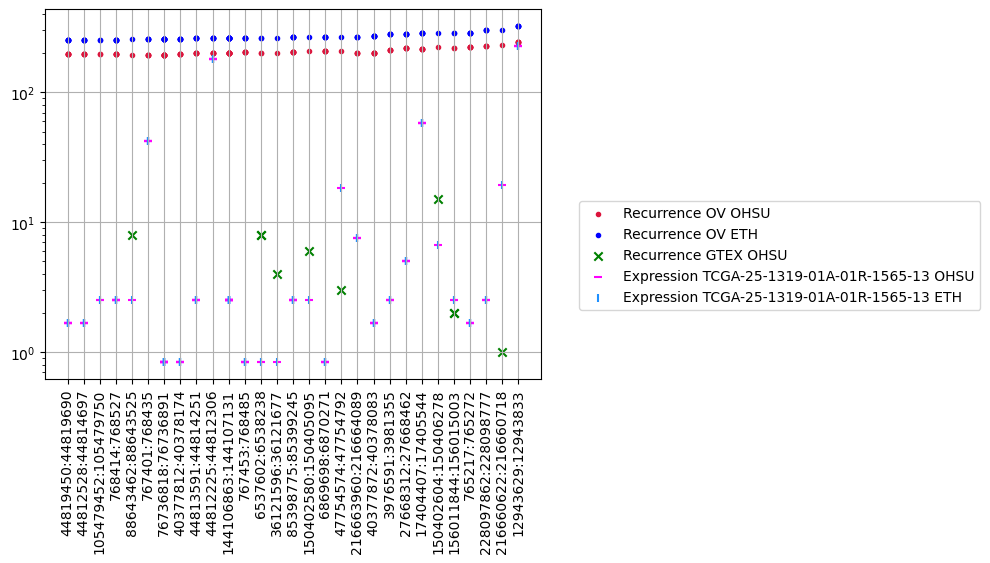

In [56]:
# Plot recurrence match 
df_plot = exact_coord_shared.loc[(exact_coord_shared['cancerCohortfilter >0.0'] > 250) & 
                                (exact_coord_shared['has_cds'] == 1)]

plt.grid()
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['OV_over_0'], 
            label = 'Recurrence OV OHSU', color = 'crimson', marker=".")
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['cancerCohortfilter >0.0'], 
            label = 'Recurrence OV ETH', color = 'blue', marker=".")
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['GTEx_core_over0'], 
            label = 'Recurrence GTEX OHSU', color='green', marker='x')
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['TCGA-25-1319-01A-01R-1565-13'], 
            label = 'Expression TCGA-25-1319-01A-01R-1565-13 OHSU', color='magenta', marker='_')
plt.scatter(df_plot['junction_coordinate'], 
            df_plot['TCGA25131901A01R156513all'], 
            label = 'Expression TCGA-25-1319-01A-01R-1565-13 ETH', color='dodgerblue', marker='|')

plt.yscale('log')

plt.legend(bbox_to_anchor=(1.4, 0., 0.5, 0.5), loc = 'upper right')
plt.xticks(rotation=90)


save = True
name = 'shared_coordinates'
save_path = os.path.join(plot_dir, f'{base_plot}_{name}.pdf')
if save:
    print("save to {}".format(save_path))
    plt.savefig(save_path, bbox_inches='tight')
    
fig.show()



In [57]:
# Small explode test 

df_plot['kmer_ohsu'] = df_plot['in-frame_neoepitopes'].str.split(';')
df_plot.shape
df_plot = df_plot.explode('kmer_ohsu')

print(df_plot['junction_coordinate'].unique().shape)
print(df_plot.loc[df_plot['kmer'] == df_plot['kmer_ohsu']].shape)

/scratch/slurm-job.874041/ipykernel_3371416/1076816925.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_plot['kmer_ohsu'] = df_plot['in-frame_neoepitopes'].str.split(';')


In [69]:
col_ohsu = ['jx', 
       'TCGA-25-1319-01A-01R-1565-13',
       'GTEx_brain_testis_over0', 
       'GTEx_breast_over0', 
       'GTEx_core_over0', 
       'OV_over_0', 
       'motif', 'annotation', 'has_cds', 'gene',
       'gene_id', 'upstream_exon', 'upstream_txs', 'downstream_exon']
#exact_coord.loc[:, col_ohsu]

In [70]:
col_eth = ['kmer',  'coord',
       'junctionAnnotated', 'readFrameAnnotated', 'isCrossJunction', 'batch',
       'cancerCohortfilter >0.0', 
       'TCGA25131901A01R156513all', 'isAnnotated', 'strand',
       'junction_coordinate', 'coordinate_in_GTEX', 'gtexExon2<cancExon2',
       'info_not_available']
#df_shared.loc[df_shared['cancerCohortfilter >0.0'] > 200, col_eth]


In [32]:
len(diff_coord.intersection(diff_coord_no_shift))

2047

In [33]:
# Look diff
diff_eth = df_shared.set_index('junction_coordinate').loc[list(diff_coord.intersection(diff_coord_no_shift))].reset_index()

diff_eth.loc[diff_eth['cancerCohortfilter >0.0']>100, col_eth]

,kmer,coord,junctionAnnotated,readFrameAnnotated,isCrossJunction,batch,cancerCohortfilter >0.0,TCGA25131901A01R156513all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available
19,HDHYMLAEA,44811316:44811329:44812289:44812300:44812366:4...,False,False,True,28986,137,0.839305,NaN,+,44811329:44812289:44812300:44812366,True,False,False
26,NAGKKKCSV,27669232:27669239:27668517:27668535:27668310:2...,True,True,True,924,122,0.839305,NaN,-,27668535:27669232:27668517:27668312,True,False,False
27,AGKKKCSVA,27669232:27669236:27668517:27668535:27668307:2...,True,True,True,924,122,0.839305,NaN,-,27668535:27669232:27668517:27668312,True,False,False
28,GKKKCSVAA,27669232:27669233:27668517:27668535:27668304:2...,True,True,True,924,122,0.839305,NaN,-,27668535:27669232:27668517:27668312,True,False,False
49,QLGGFGDEC,44819177:44819183:44820804:44820822:44820915:4...,True,False,True,28986,198,0.839305,NaN,+,44819183:44820804:44820822:44820915,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4664,IAKAVHWAD,8863965:8863976:8863234:8863248:8862943:8862945,True,False,True,304,104,2.517914,NaN,-,8863248:8863965:8863234:8862945,True,False,False
4665,AKAVHWADQ,8863965:8863973:8863234:8863248:8862940:8862945,True,False,True,304,104,2.517914,NaN,-,8863248:8863965:8863234:8862945,True,False,False
4744,YWMYIIPAA,50480974:50480977:50482148:50482163:50483025:5...,True,False,True,29328,235,0.839305,NaN,+,50480977:50482148:50482163:50483025,True,False,False
4745,KYWMYIIPA,50480971:50480977:50482148:50482163:50483025:5...,True,False,True,29328,235,0.839305,NaN,+,50480977:50482148:50482163:50483025,True,False,False


In [34]:
# EXPLODE FOR KMERS
ohsu_gener['kmer'] = ohsu_gener['in-frame_neoepitopes'].str.split(';')
ohsu_gener.shape
ohsu_gener = ohsu_gener.explode('kmer')

In [35]:
# TEST KMER
kmer = 'VMVDMEKIW'
display(ohsu_gener.loc[ohsu_gener['kmer'] == kmer, col_ohsu + ['junction_coordinate']])
display(diff_eth.loc[diff_eth['kmer'] == kmer, col_eth])


,jx,TCGA-25-1319-01A-01R-1565-13,GTEx_brain_testis_over0,GTEx_breast_over0,GTEx_core_over0,OV_over_0,motif,annotation,has_cds,gene,gene_id,upstream_exon,upstream_txs,downstream_exon,junction_coordinate
465081,chr17;81512025;81512129;-,0.839305,0.0,0.0,0.0,103,GCCG,0,1,ACTG1,ENSG00000184009.12,1.0,ENST00000644774.1;ENST00000575087.5;ENST000005...,1.0,81512024:81512129
619851,chr7;5529283;5529387;-,1.678609,0.0,0.0,2.0,26,GCCG,0,1,ACTB,ENSG00000075624.16,1.0,ENST00000645576.1;ENST00000443528.5;ENST000006...,1.0,5529282:5529387


,kmer,coord,junctionAnnotated,readFrameAnnotated,isCrossJunction,batch,cancerCohortfilter >0.0,TCGA25131901A01R156513all,isAnnotated,strand,junction_coordinate,coordinate_in_GTEX,gtexExon2<cancExon2,info_not_available


In [80]:
print(max(ohsu_gener['OV_over_0']))
print(max(ohsu_gener['GTEx_brain_testis_over0']))
print(max(ohsu_gener['GTEx_core_over0']))


289
1606.0
7908.0
1088


In [78]:
eth_gener = pd.read_csv('/cluster/work/grlab/projects/projects2020_OHSU/peptides_generation/CANCER_eth/commit_c4dd02c_conf2_Frame_cap0_runs/TCGA_Ovarian_374/filtering_intermediate/complete_cancer_candidates_order_r.tsv.gz', 
           sep ='\t')

In [79]:
print(max(eth_gener['cancerCohortfilter >0.0']))
print(max(eth_gener['gtexCohortfilter >0.0']))


374
9476.0
